    Outlook Temperature Humidity    Wind Playcricket
0     Sunny         Hot     High    Weak          No
1     Sunny         Hot     High  Strong          No
2  Overcast         Hot     High    Weak         Yes
3      Rain        Mild     High    Weak         Yes
4      Rain        Cool   Normal    Weak         Yes
[[2 0 1 1]
 [0 1 1 1]
 [1 0 2 0]
 [1 2 0 0]
 [1 2 0 1]
 [2 1 0 0]
 [0 2 0 0]
 [0 1 0 1]
 [0 0 1 0]
 [2 2 0 1]]
Predicted values:
[0 1 1 0]
75.0


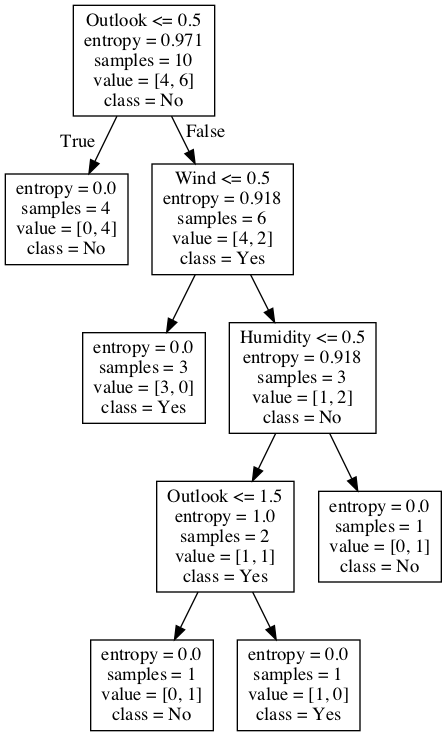

In [10]:
#!/usr/bin/python
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
from IPython.display import Image
import pydotplus
from sklearn import tree

data = pd.read_csv('/Users/vigneshkumarthangarajan/Documents/Large-Scale/data.csv', sep=',', header = 0)
data = data.drop(data.columns[0], axis='columns')
print(data.head())

data = data.apply(preprocessing.LabelEncoder().fit_transform)

# Spliting the dataset into train and test 
train=data.sample(frac=0.7,random_state=200)
test=data.drop(train.index)

train_x = train.values[:, 0:4]
train_y = train.values[:, 4]
print(train_x)

col = ['Outlook','Temperature','Humidity','Wind']
clas = ['Yes', 'No']

# Decision tree with entropy
clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100)

# Performing training
clf_entropy.fit(train_x, train_y)

#tree.plot_tree(clf_entropy)

test_x = test.values[:, 0:4]
test_y = test.values[:, 4]

y_pred = clf_entropy.predict(test_x)
print("Predicted values:")
print(y_pred)


print(accuracy_score(test_y,y_pred)*100)

dot_data = tree.export_graphviz(clf_entropy, out_file=None, 
                                feature_names=col,  
                                class_names=clas)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())